In [42]:
import pandas as pd
import json
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
file_path = r'/content/gdrive/MyDrive/IPD/Dataset/disease and symptoms.csv'
with open(file_path, 'r', encoding='utf-16') as file:
    for _ in range(10):
        print(file.readline())


Code,name,symptoms,Desc,commonTestsAndProceduresDesc,commonTestsAndProcedures,commonMedicationsDesc,commonMedications,whoIsAtRiskDesc,symptomsDesc

105,Panic disorder,[{"symptoms":"Anxiety and nervousness"},{"symptoms":"88"},{"symptoms":"Depression"},{"symptoms":"55"},{"symptoms":"Shortness of breath"},{"symptoms":"40"},{"symptoms":"Depressive or psychotic symptoms"},{"symptoms":"33"},{"symptoms":"Sharp chest pain"},{"symptoms":"33"},{"symptoms":"Dizziness"},{"symptoms":"24"},{"symptoms":"Insomnia"},{"symptoms":"18"},{"symptoms":"Abnormal involuntary movements"},{"symptoms":"16"},{"symptoms":"Chest tightness"},{"symptoms":"14"},{"symptoms":"Palpitations"},{"symptoms":"13"},{"symptoms":"Irregular heartbeat"},{"symptoms":"11"},{"symptoms":"Breathing fast"},{"symptoms":"10"}],Panic disorder 	 		 	Panic disorder is an anxiety disorder characterized by recurring severe panic attacks. It may also include significant behavioral changes lasting at least a month and of ongoing worry about the i

In [4]:
rows = []
with open(file_path, 'r', encoding='utf-16') as file:
    for line_number, line in enumerate(file, start=1):
        try:
            parts = line.split(",")
            code = parts[0]
            name = parts[1]
            symptoms = ''
            for part in parts[2:]:
                symptoms += part
                if ']' in part:
                    break
            rows.append([code, name, symptoms])
        except ValueError as e:
            print(f"Error in line {line_number}: {e}")
columns = ["code", "name", "symptoms"]
df = pd.DataFrame(rows, columns=columns)

In [5]:
df

,code,name,symptoms
0,Code,name,symptomsDesccommonTestsAndProceduresDesccommon...
1,105,Panic disorder,"[{""symptoms"":""Anxiety and nervousness""}{""sympt..."
2,106,Vocal cord polyp,"[{""symptoms"":""Hoarse voice""}{""symptoms"":""91""}{..."
3,107,Turner syndrome,"[{""symptoms"":""Groin mass""}{""symptoms"":""27""}{""s..."
4,108,Cryptorchidism,"[{""symptoms"":""Symptoms of the scrotum and test..."
...,...,...,...
792,602,Kaposi sarcoma,"[{""symptoms"":""Leg pain""}{""symptoms"":""45""}{""sym..."
793,603,Spondylolisthesis,"[{""symptoms"":""Low back pain""}{""symptoms"":""80""}..."
794,604,Pseudotumor cerebri,"[{""symptoms"":""Headache""}{""symptoms"":""88""}{""sym..."
795,605,Conjunctivitis due to virus,"[{""symptoms"":""Eye redness""}{""symptoms"":""91""}{""..."


In [6]:
df = df.iloc[1:]
df

,code,name,symptoms
1,105,Panic disorder,"[{""symptoms"":""Anxiety and nervousness""}{""sympt..."
2,106,Vocal cord polyp,"[{""symptoms"":""Hoarse voice""}{""symptoms"":""91""}{..."
3,107,Turner syndrome,"[{""symptoms"":""Groin mass""}{""symptoms"":""27""}{""s..."
4,108,Cryptorchidism,"[{""symptoms"":""Symptoms of the scrotum and test..."
5,109,Poisoning due to ethylene glycol,"[{""symptoms"":""Abusing alcohol""}{""symptoms"":""78..."
...,...,...,...
792,602,Kaposi sarcoma,"[{""symptoms"":""Leg pain""}{""symptoms"":""45""}{""sym..."
793,603,Spondylolisthesis,"[{""symptoms"":""Low back pain""}{""symptoms"":""80""}..."
794,604,Pseudotumor cerebri,"[{""symptoms"":""Headache""}{""symptoms"":""88""}{""sym..."
795,605,Conjunctivitis due to virus,"[{""symptoms"":""Eye redness""}{""symptoms"":""91""}{""..."


In [7]:
df['symptoms'].head()


1    [{"symptoms":"Anxiety and nervousness"}{"sympt...
2    [{"symptoms":"Hoarse voice"}{"symptoms":"91"}{...
3    [{"symptoms":"Groin mass"}{"symptoms":"27"}{"s...
4    [{"symptoms":"Symptoms of the scrotum and test...
5    [{"symptoms":"Abusing alcohol"}{"symptoms":"78...
Name: symptoms, dtype: object

In [8]:
df['symptoms'] = df['symptoms'].str.strip('[]')

<ipython-input-8-eab9bb7387d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['symptoms'] = df['symptoms'].str.strip('[]')


In [9]:
df['symptoms'].head()

1    {"symptoms":"Anxiety and nervousness"}{"sympto...
2    {"symptoms":"Hoarse voice"}{"symptoms":"91"}{"...
3    {"symptoms":"Groin mass"}{"symptoms":"27"}{"sy...
4    {"symptoms":"Symptoms of the scrotum and teste...
5    {"symptoms":"Abusing alcohol"}{"symptoms":"78"...
Name: symptoms, dtype: object

In [10]:
df['first_symptom'] = df['symptoms'].str.extract(r'{"symptoms":"([^"}]+)"}')

<ipython-input-10-abcfc48c45b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_symptom'] = df['symptoms'].str.extract(r'{"symptoms":"([^"}]+)"}')


In [11]:
df.head()

,code,name,symptoms,first_symptom
1,105,Panic disorder,"{""symptoms"":""Anxiety and nervousness""}{""sympto...",Anxiety and nervousness
2,106,Vocal cord polyp,"{""symptoms"":""Hoarse voice""}{""symptoms"":""91""}{""...",Hoarse voice
3,107,Turner syndrome,"{""symptoms"":""Groin mass""}{""symptoms"":""27""}{""sy...",Groin mass
4,108,Cryptorchidism,"{""symptoms"":""Symptoms of the scrotum and teste...",Symptoms of the scrotum and testes
5,109,Poisoning due to ethylene glycol,"{""symptoms"":""Abusing alcohol""}{""symptoms"":""78""...",Abusing alcohol


In [12]:
pattern = r'{"symptoms":"([^"}]+)"}'
df_symptoms = df['symptoms'].str.extractall(pattern)
df_symptoms = df_symptoms.unstack().droplevel(0, axis=1)
df_symptoms.columns = [f'symptom_{i + 1}' for i in range(df_symptoms.shape[1])]
df = pd.concat([df, df_symptoms], axis=1)


In [13]:
df

,code,name,symptoms,first_symptom,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,...,symptom_15,symptom_16,symptom_17,symptom_18,symptom_19,symptom_20,symptom_21,symptom_22,symptom_23,symptom_24
1,105,Panic disorder,"{""symptoms"":""Anxiety and nervousness""}{""sympto...",Anxiety and nervousness,Anxiety and nervousness,88,Depression,55,Shortness of breath,40,...,Abnormal involuntary movements,16,Chest tightness,14,Palpitations,13,Irregular heartbeat,11,Breathing fast,10
2,106,Vocal cord polyp,"{""symptoms"":""Hoarse voice""}{""symptoms"":""91""}{""...",Hoarse voice,Hoarse voice,91,Sore throat,47,Difficulty speaking,27,...,Lump in throat,19,Throat feels tight,11,Difficulty in swallowing,11,Skin swelling,11,Retention of urine,11
3,107,Turner syndrome,"{""symptoms"":""Groin mass""}{""symptoms"":""27""}{""sy...",Groin mass,Groin mass,27,Leg pain,27,Hip pain,27,...,Depression,27,Emotional symptoms,2,Elbow weakness,2,Back weakness,2,Pus in sputum,2
4,108,Cryptorchidism,"{""symptoms"":""Symptoms of the scrotum and teste...",Symptoms of the scrotum and testes,Symptoms of the scrotum and testes,50,Swelling of scrotum,16,Pain in testicles,9,...,Lack of growth,9,White discharge from eye,9,Irritable infant,9,NaN,NaN,NaN,NaN
5,109,Poisoning due to ethylene glycol,"{""symptoms"":""Abusing alcohol""}{""symptoms"":""78""...",Abusing alcohol,Abusing alcohol,78,Fainting,64,Hostile behavior,45,...,Vomiting,29,Headache,29,Depression,29,Nausea,29,Diarrhea,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,602,Kaposi sarcoma,"{""symptoms"":""Leg pain""}{""symptoms"":""45""}{""symp...",Leg pain,Leg pain,45,Foot or toe pain,45,Cough,45,...,Elbow cramps or spasms,3,Elbow weakness,3,Excessive growth,3,Underweight,3,Low back weakness,3
793,603,Spondylolisthesis,"{""symptoms"":""Low back pain""}{""symptoms"":""80""}{...",Low back pain,Low back pain,80,Back pain,79,Leg pain,74,...,Paresthesia,17,Problems with movement,13,Leg weakness,9,Leg cramps or spasms,5,Pain or soreness of breast,5
794,604,Pseudotumor cerebri,"{""symptoms"":""Headache""}{""symptoms"":""88""}{""symp...",Headache,Headache,88,Diminished vision,50,Dizziness,26,...,Diminished hearing,11,Regurgitation,11,Spots or clouds in vision,11,Abnormal involuntary movements,11,Slurring words,11
795,605,Conjunctivitis due to virus,"{""symptoms"":""Eye redness""}{""symptoms"":""91""}{""s...",Eye redness,Eye redness,91,Pain in eye,66,Itchiness of eye,54,...,Cough,38,Lacrimation,29,Coryza,29,Eye burns or stings,19,Diminished vision,19


In [14]:
df = df.drop('symptoms', axis=1)
df= df.drop('first_symptom',axis=1)

In [15]:
df.head()

,code,name,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,symptom_8,...,symptom_15,symptom_16,symptom_17,symptom_18,symptom_19,symptom_20,symptom_21,symptom_22,symptom_23,symptom_24
1,105,Panic disorder,Anxiety and nervousness,88,Depression,55,Shortness of breath,40,Depressive or psychotic symptoms,33,...,Abnormal involuntary movements,16,Chest tightness,14,Palpitations,13,Irregular heartbeat,11,Breathing fast,10
2,106,Vocal cord polyp,Hoarse voice,91,Sore throat,47,Difficulty speaking,27,Cough,27,...,Lump in throat,19,Throat feels tight,11,Difficulty in swallowing,11,Skin swelling,11,Retention of urine,11
3,107,Turner syndrome,Groin mass,27,Leg pain,27,Hip pain,27,Suprapubic pain,27,...,Depression,27,Emotional symptoms,2,Elbow weakness,2,Back weakness,2,Pus in sputum,2
4,108,Cryptorchidism,Symptoms of the scrotum and testes,50,Swelling of scrotum,16,Pain in testicles,9,Flatulence,9,...,Lack of growth,9,White discharge from eye,9,Irritable infant,9,NaN,NaN,NaN,NaN
5,109,Poisoning due to ethylene glycol,Abusing alcohol,78,Fainting,64,Hostile behavior,45,Drug abuse,45,...,Vomiting,29,Headache,29,Depression,29,Nausea,29,Diarrhea,29


In [16]:
df1 = df.copy()

In [17]:
df1['symptoms'] = df1.apply(lambda row: {row[f'symptom_1']: row[f'symptom_2'] for i in range(1, 25) if pd.notna(row[f'symptom_1'])}, axis=1)


In [18]:
df1.head()

,code,name,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,symptom_8,...,symptom_16,symptom_17,symptom_18,symptom_19,symptom_20,symptom_21,symptom_22,symptom_23,symptom_24,symptoms
1,105,Panic disorder,Anxiety and nervousness,88,Depression,55,Shortness of breath,40,Depressive or psychotic symptoms,33,...,16,Chest tightness,14,Palpitations,13,Irregular heartbeat,11,Breathing fast,10,{'Anxiety and nervousness': '88'}
2,106,Vocal cord polyp,Hoarse voice,91,Sore throat,47,Difficulty speaking,27,Cough,27,...,19,Throat feels tight,11,Difficulty in swallowing,11,Skin swelling,11,Retention of urine,11,{'Hoarse voice': '91'}
3,107,Turner syndrome,Groin mass,27,Leg pain,27,Hip pain,27,Suprapubic pain,27,...,27,Emotional symptoms,2,Elbow weakness,2,Back weakness,2,Pus in sputum,2,{'Groin mass': '27'}
4,108,Cryptorchidism,Symptoms of the scrotum and testes,50,Swelling of scrotum,16,Pain in testicles,9,Flatulence,9,...,9,White discharge from eye,9,Irritable infant,9,NaN,NaN,NaN,NaN,{'Symptoms of the scrotum and testes': '50'}
5,109,Poisoning due to ethylene glycol,Abusing alcohol,78,Fainting,64,Hostile behavior,45,Drug abuse,45,...,29,Headache,29,Depression,29,Nausea,29,Diarrhea,29,{'Abusing alcohol': '78'}


In [19]:
df1['symptoms'] = df1.apply(lambda row: {key: value for i in range(1, 25, 2) if pd.notna(row[f'symptom_{i}']) and pd.notna(row[f'symptom_{i + 1}']) for key, value in [(row[f'symptom_{i}'], row[f'symptom_{i + 1}'])]}, axis=1)

In [20]:
df1.head()

,code,name,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,symptom_8,...,symptom_16,symptom_17,symptom_18,symptom_19,symptom_20,symptom_21,symptom_22,symptom_23,symptom_24,symptoms
1,105,Panic disorder,Anxiety and nervousness,88,Depression,55,Shortness of breath,40,Depressive or psychotic symptoms,33,...,16,Chest tightness,14,Palpitations,13,Irregular heartbeat,11,Breathing fast,10,"{'Anxiety and nervousness': '88', 'Depression'..."
2,106,Vocal cord polyp,Hoarse voice,91,Sore throat,47,Difficulty speaking,27,Cough,27,...,19,Throat feels tight,11,Difficulty in swallowing,11,Skin swelling,11,Retention of urine,11,"{'Hoarse voice': '91', 'Sore throat': '47', 'D..."
3,107,Turner syndrome,Groin mass,27,Leg pain,27,Hip pain,27,Suprapubic pain,27,...,27,Emotional symptoms,2,Elbow weakness,2,Back weakness,2,Pus in sputum,2,"{'Groin mass': '27', 'Leg pain': '27', 'Hip pa..."
4,108,Cryptorchidism,Symptoms of the scrotum and testes,50,Swelling of scrotum,16,Pain in testicles,9,Flatulence,9,...,9,White discharge from eye,9,Irritable infant,9,NaN,NaN,NaN,NaN,"{'Symptoms of the scrotum and testes': '50', '..."
5,109,Poisoning due to ethylene glycol,Abusing alcohol,78,Fainting,64,Hostile behavior,45,Drug abuse,45,...,29,Headache,29,Depression,29,Nausea,29,Diarrhea,29,"{'Abusing alcohol': '78', 'Fainting': '64', 'H..."


In [21]:
df1 = df1.drop(columns=[f'symptom_{i}' for i in range(1, 25)])

In [22]:
df1.head()

,code,name,symptoms
1,105,Panic disorder,"{'Anxiety and nervousness': '88', 'Depression'..."
2,106,Vocal cord polyp,"{'Hoarse voice': '91', 'Sore throat': '47', 'D..."
3,107,Turner syndrome,"{'Groin mass': '27', 'Leg pain': '27', 'Hip pa..."
4,108,Cryptorchidism,"{'Symptoms of the scrotum and testes': '50', '..."
5,109,Poisoning due to ethylene glycol,"{'Abusing alcohol': '78', 'Fainting': '64', 'H..."


In [23]:
print(df1['symptoms'][1])

{'Anxiety and nervousness': '88', 'Depression': '55', 'Shortness of breath': '40', 'Depressive or psychotic symptoms': '33', 'Sharp chest pain': '33', 'Dizziness': '24', 'Insomnia': '18', 'Abnormal involuntary movements': '16', 'Chest tightness': '14', 'Palpitations': '13', 'Irregular heartbeat': '11', 'Breathing fast': '10'}


In [24]:
import pandas as pd

rows = []
with open(file_path, 'r', encoding='utf-16') as file:
    for line_number, line in enumerate(file, start=1):
        try:
            parts = line.split(",")
            code = parts[0]
            name = parts[1]
            symptoms = ''
            for part in parts[2:]:
                symptoms += part
                if ']' in part:
                    break
            if '],' in line:
                description = line.split("],")[1].strip()
                test_procedure = line.split("],")[1].split(",[", 1)[1].strip()

                # Extract text after 'test_procedure' ends and store it in a new column
                remaining_text = line.split("],")[1].split(",[", 1)[1].strip()
                extra_data_start = "The most"
                if extra_data_start in line:
                    extra_data = "The most "+ line.split(extra_data_start, 1)[1].strip()
                else:
                    extra_data = ''

            else:
                description = ''
                test_procedure = ''
                extra_data = ''

            rows.append([code, name, symptoms, description, test_procedure, extra_data])
        except ValueError as e:
            print(f"Error in line {line_number}: {e}")

columns = ["code", "name", "symptoms", "description", "test_procedure", "extra_data"]
df2 = pd.DataFrame(rows, columns=columns)



In [25]:
df2 = df2.iloc[1:]
df2

,code,name,symptoms,description,test_procedure,extra_data
1,105,Panic disorder,"[{""symptoms"":""Anxiety and nervousness""}{""sympt...",Panic disorder \t \t\t \tPanic disorder is an ...,"{""commonTestsAndProcedures"":""Psychotherapy""},{...",The most commonly prescribed drugs for patient...
2,106,Vocal cord polyp,"[{""symptoms"":""Hoarse voice""}{""symptoms"":""91""}{...",Vocal cord polyp \t \t \t\tVocal cord polyp is...,"{""commonTestsAndProcedures"":""Tracheoscopy and ...",The most commonly prescribed drugs for patient...
3,107,Turner syndrome,"[{""symptoms"":""Groin mass""}{""symptoms"":""27""}{""s...",Turner syndrome \t Also known as Gonadal Dysge...,"{""commonTestsAndProcedures"":""Complete physical...",The most commonly prescribed drugs for patient...
4,108,Cryptorchidism,"[{""symptoms"":""Symptoms of the scrotum and test...",Cryptorchidism \t Also known as Undescended Te...,"{""commonTestsAndProcedures"":""Complete physical...",The most commonly prescribed drugs for patient...
5,109,Poisoning due to ethylene glycol,"[{""symptoms"":""Abusing alcohol""}{""symptoms"":""78...",Poisoning due to ethylene glycol \t Also known...,"{""commonTestsAndProcedures"":""Intravenous fluid...",The most commonly prescribed drugs for patient...
...,...,...,...,...,...,...
792,602,Kaposi sarcoma,"[{""symptoms"":""Leg pain""}{""symptoms"":""45""}{""sym...",Kaposi sarcoma \t \t\t \tKaposi sarcoma (KS) i...,"{""commonTestsAndProcedures"":""Glucose measureme...",The most commonly prescribed drugs for patient...
793,603,Spondylolisthesis,"[{""symptoms"":""Low back pain""}{""symptoms"":""80""}...",Spondylolisthesis \t \t\t \tSpondylolisthesis ...,"{""commonTestsAndProcedures"":""Radiographic imag...",The most commonly prescribed drugs for patient...
794,604,Pseudotumor cerebri,"[{""symptoms"":""Headache""}{""symptoms"":""88""}{""sym...",Pseudotumor cerebri \t Also known as Benign In...,"{""commonTestsAndProcedures"":""Intravenous fluid...",The most commonly prescribed drugs for patient...
795,605,Conjunctivitis due to virus,"[{""symptoms"":""Eye redness""}{""symptoms"":""91""}{""...",Conjunctivitis due to virus \t Also known as V...,"{""commonTestsAndProcedures"":""Ophthalmic examin...",The most commonly prescribed drugs for patient...


In [26]:
df2['description'] = df2['description'].str.replace(r'\t', ' ').str.replace(r',\[.*', '', regex=True)

<ipython-input-26-be407453cf02>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['description'] = df2['description'].str.replace(r'\t', ' ').str.replace(r',\[.*', '', regex=True)


In [27]:
df2['description'] = df2.apply(lambda row: row['description'].replace(row['name'], '', 1), axis=1)

In [28]:

df2['description'] = df2['description'].str.replace(r'\s+', ' ')


<ipython-input-28-0ef213865e9b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['description'] = df2['description'].str.replace(r'\s+', ' ')


In [29]:
df2.head()

,code,name,symptoms,description,test_procedure,extra_data
1,105,Panic disorder,"[{""symptoms"":""Anxiety and nervousness""}{""sympt...",Panic disorder is an anxiety disorder charact...,"{""commonTestsAndProcedures"":""Psychotherapy""},{...",The most commonly prescribed drugs for patient...
2,106,Vocal cord polyp,"[{""symptoms"":""Hoarse voice""}{""symptoms"":""91""}{...",Vocal cord polyp is encountered rarely on Sym...,"{""commonTestsAndProcedures"":""Tracheoscopy and ...",The most commonly prescribed drugs for patient...
3,107,Turner syndrome,"[{""symptoms"":""Groin mass""}{""symptoms"":""27""}{""s...","Also known as Gonadal Dysgenesis, XO Syndrome...","{""commonTestsAndProcedures"":""Complete physical...",The most commonly prescribed drugs for patient...
4,108,Cryptorchidism,"[{""symptoms"":""Symptoms of the scrotum and test...","Also known as Undescended Testes, Cryptorchis...","{""commonTestsAndProcedures"":""Complete physical...",The most commonly prescribed drugs for patient...
5,109,Poisoning due to ethylene glycol,"[{""symptoms"":""Abusing alcohol""}{""symptoms"":""78...",Also known as Anti Freeze Poisoning and Ethyl...,"{""commonTestsAndProcedures"":""Intravenous fluid...",The most commonly prescribed drugs for patient...


In [30]:
import re
df2['Test_Procedures'] = df2['test_procedure'].apply(lambda x: re.findall(r'"commonTestsAndProcedures":"(.*?)"', x))
df2=df2.drop('test_procedure',axis=1)

In [31]:
df2['extra_data2'] = df2['extra_data'].apply(lambda x: x.split(",[", 1)[1].strip() if ",[" in x else '')

In [32]:
df2['extra_data'] = df2['extra_data'].apply(lambda x: x.split(",[", 1)[0].strip() if ",[" in x else x)
df2['extra_data'] = df2['extra_data'].str.replace('\s+', ' ', regex=True)
df2 = df2.rename(columns={'extra_data': 'medication_desc'})

In [33]:
df2['extra_data3'] = df2['extra_data2'].apply(lambda x: x.split('],')[1].strip() if '],' in x else '')

In [34]:
df2['extra_data2'] = df2['extra_data2'].apply(lambda x: x.split('],')[0] if '],' in x else x)
df2['medications'] = df2['extra_data2'].apply(lambda x: re.findall(r'"commonMedications":"(.*?)"', x))
df2=df2.drop('extra_data2',axis=1)

In [35]:
df2['extra_data4'] = df2['extra_data3'].apply(lambda x: x.split('.,')[1].strip() if '.,' in x else '')

In [36]:
df2['extra_data3'] = df2['extra_data3'].apply(lambda x: x.split('.,')[0].strip() if '.,' in x else x)
df2['extra_data3'] = df2['extra_data3'].str.replace('\s+', ' ', regex=True)

In [37]:
df2['extra_data4'] = df2['extra_data4'].str.replace('\s+', ' ', regex=True)

In [38]:
df2.head()

,code,name,symptoms,description,medication_desc,Test_Procedures,extra_data3,medications,extra_data4
1,105,Panic disorder,"[{""symptoms"":""Anxiety and nervousness""}{""sympt...",Panic disorder is an anxiety disorder charact...,The most commonly prescribed drugs for patient...,"[Psychotherapy, Mental health counseling, Elec...",Groups of people at highest risk for panic dis...,"[Lorazepam, Alprazolam (Xanax), Clonazepam, Pa...",Within all the people who go to their doctor w...
2,106,Vocal cord polyp,"[{""symptoms"":""Hoarse voice""}{""symptoms"":""91""}{...",Vocal cord polyp is encountered rarely on Sym...,The most commonly prescribed drugs for patient...,"[Tracheoscopy and laryngoscopy with biopsy, Oc...",Groups of people at highest risk for vocal cor...,"[Esomeprazole (Nexium), Beclomethasone Nasal P...",Within all the people who go to their doctor w...
3,107,Turner syndrome,"[{""symptoms"":""Groin mass""}{""symptoms"":""27""}{""s...","Also known as Gonadal Dysgenesis, XO Syndrome...",The most commonly prescribed drugs for patient...,"[Complete physical skin exam performed (ML), U...",Groups of people at highest risk for turner sy...,"[Somatropin, Sulfamethoxazole (Bactrim), Pimec...",Within all the people who go to their doctor w...
4,108,Cryptorchidism,"[{""symptoms"":""Symptoms of the scrotum and test...","Also known as Undescended Testes, Cryptorchis...",The most commonly prescribed drugs for patient...,"[Complete physical skin exam performed (ML), U...",Groups of people at highest risk for cryptorch...,"[Haemophilus B Conjugate Vaccine (Obsolete), H...",Within all the people who go to their doctor w...
5,109,Poisoning due to ethylene glycol,"[{""symptoms"":""Abusing alcohol""}{""symptoms"":""78...",Also known as Anti Freeze Poisoning and Ethyl...,The most commonly prescribed drugs for patient...,"[Intravenous fluid replacement, Hematologic te...",Groups of people at highest risk for poisoning...,"[Lorazepam, Thiamine, Naloxone (Suboxone), Cha...",Within all the people who go to their doctor w...


In [39]:
print(df2['extra_data3'][1])

Groups of people at highest risk for panic disorder include age 30-44 years. On the other hand, age 1-4 years and age < 1 years almost never get panic disorder


In [40]:
df1['description'] = df2['description']
df1['test_procedure']=df2['Test_Procedures']
df1['medication_desc']=df2['medication_desc']
df1['medications'] = df2['medications']
df1['risk_age'] = df2['extra_data3']
df1['symptom_desc'] = df2['extra_data4']

In [41]:
df1.head()

,code,name,symptoms,description,test_procedure,medication_desc,medications,risk_age,symptom_desc
1,105,Panic disorder,"{'Anxiety and nervousness': '88', 'Depression'...",Panic disorder is an anxiety disorder charact...,"[Psychotherapy, Mental health counseling, Elec...",The most commonly prescribed drugs for patient...,"[Lorazepam, Alprazolam (Xanax), Clonazepam, Pa...",Groups of people at highest risk for panic dis...,Within all the people who go to their doctor w...
2,106,Vocal cord polyp,"{'Hoarse voice': '91', 'Sore throat': '47', 'D...",Vocal cord polyp is encountered rarely on Sym...,"[Tracheoscopy and laryngoscopy with biopsy, Oc...",The most commonly prescribed drugs for patient...,"[Esomeprazole (Nexium), Beclomethasone Nasal P...",Groups of people at highest risk for vocal cor...,Within all the people who go to their doctor w...
3,107,Turner syndrome,"{'Groin mass': '27', 'Leg pain': '27', 'Hip pa...","Also known as Gonadal Dysgenesis, XO Syndrome...","[Complete physical skin exam performed (ML), U...",The most commonly prescribed drugs for patient...,"[Somatropin, Sulfamethoxazole (Bactrim), Pimec...",Groups of people at highest risk for turner sy...,Within all the people who go to their doctor w...
4,108,Cryptorchidism,"{'Symptoms of the scrotum and testes': '50', '...","Also known as Undescended Testes, Cryptorchis...","[Complete physical skin exam performed (ML), U...",The most commonly prescribed drugs for patient...,"[Haemophilus B Conjugate Vaccine (Obsolete), H...",Groups of people at highest risk for cryptorch...,Within all the people who go to their doctor w...
5,109,Poisoning due to ethylene glycol,"{'Abusing alcohol': '78', 'Fainting': '64', 'H...",Also known as Anti Freeze Poisoning and Ethyl...,"[Intravenous fluid replacement, Hematologic te...",The most commonly prescribed drugs for patient...,"[Lorazepam, Thiamine, Naloxone (Suboxone), Cha...",Groups of people at highest risk for poisoning...,Within all the people who go to their doctor w...


In [43]:
print(df1['risk_age'][4])

Groups of people at highest risk for cryptorchidism include race/ethnicity = other, race/ethnicity = hispanic, sex == male, age 5-14 years, age 1-4 years and age < 1 years. On the other hand, age 75+ years, age 60-74 years, and sex == female almost never get cryptorchidism


In [44]:
df1['risk_years'] = df1['risk_age'].apply(lambda x: re.findall(r'age\s*([<>+]?\s*\d+[+\d\-]*)', x.split('.')[0]) if 'age' in x else [])


In [45]:
df1['less_risk_years'] = df1['risk_age'].apply(lambda x: re.findall(r'age\s*([<>+]?\s*\d+[+\d\-]*)', x.split('.', 1)[1]) if '.' in x else [])


In [46]:
df1['high_risk_race_ethnicity'] = df1['risk_age'].apply(lambda x: re.findall(r'race/ethnicity\s*=\s*([^,. ]+)', x.split('.')[0]) or [])
df1['high_risk_gender'] = df1['risk_age'].apply(lambda x: re.findall(r'sex\s*==\s*([^\s,]+)', x.split('.')[0]) or [])

In [47]:
df1['less_risk_race_ethnicity'] = df1['risk_age'].apply(lambda x: re.findall(r'race/ethnicity\s*=\s*([^,. ]+)', x.split('.', 1)[1]) if len(x.split('.')) > 1 else [])
df1['less_risk_gender'] = df1['risk_age'].apply(lambda x: re.findall(r'sex\s*==\s*([^\s,]+)', x.split('.', 1)[1]) if len(x.split('.')) > 1 else [])


In [48]:
df1['less_risk_race_ethnicity'] = df1['less_risk_race_ethnicity'].apply(lambda x: ['NA'] if not x else x)
df1['less_risk_gender'] = df1['less_risk_gender'].apply(lambda x: ['NA'] if not x else x)
df1['high_risk_race_ethnicity'] = df1['high_risk_race_ethnicity'].apply(lambda x: ['NA'] if not x else x)
df1['high_risk_gender'] = df1['high_risk_gender'].apply(lambda x: ['NA'] if not x else x)
df1['risk_years'] = df1['risk_years'].apply(lambda x: ['NA'] if not x else x)
df1['less_risk_years'] = df1['less_risk_years'].apply(lambda x: ['NA'] if not x else x)

In [49]:
df1= df1.drop('risk_age',axis=1)

In [50]:
df1.head()

,code,name,symptoms,description,test_procedure,medication_desc,medications,symptom_desc,risk_years,less_risk_years,high_risk_race_ethnicity,high_risk_gender,less_risk_race_ethnicity,less_risk_gender
1,105,Panic disorder,"{'Anxiety and nervousness': '88', 'Depression'...",Panic disorder is an anxiety disorder charact...,"[Psychotherapy, Mental health counseling, Elec...",The most commonly prescribed drugs for patient...,"[Lorazepam, Alprazolam (Xanax), Clonazepam, Pa...",Within all the people who go to their doctor w...,[30-44],"[1-4, < 1]",[NA],[NA],[NA],[NA]
2,106,Vocal cord polyp,"{'Hoarse voice': '91', 'Sore throat': '47', 'D...",Vocal cord polyp is encountered rarely on Sym...,"[Tracheoscopy and laryngoscopy with biopsy, Oc...",The most commonly prescribed drugs for patient...,"[Esomeprazole (Nexium), Beclomethasone Nasal P...",Within all the people who go to their doctor w...,"[60-74, 45-59]",[NA],[NA],[NA],[NA],[NA]
3,107,Turner syndrome,"{'Groin mass': '27', 'Leg pain': '27', 'Hip pa...","Also known as Gonadal Dysgenesis, XO Syndrome...","[Complete physical skin exam performed (ML), U...",The most commonly prescribed drugs for patient...,"[Somatropin, Sulfamethoxazole (Bactrim), Pimec...",Within all the people who go to their doctor w...,"[5-14, 1-4]","[75+, 60-74]",[other],[female],[NA],[NA]
4,108,Cryptorchidism,"{'Symptoms of the scrotum and testes': '50', '...","Also known as Undescended Testes, Cryptorchis...","[Complete physical skin exam performed (ML), U...",The most commonly prescribed drugs for patient...,"[Haemophilus B Conjugate Vaccine (Obsolete), H...",Within all the people who go to their doctor w...,"[5-14, 1-4, < 1]","[75+, 60-74]","[other, hispanic]",[male],[NA],[female]
5,109,Poisoning due to ethylene glycol,"{'Abusing alcohol': '78', 'Fainting': '64', 'H...",Also known as Anti Freeze Poisoning and Ethyl...,"[Intravenous fluid replacement, Hematologic te...",The most commonly prescribed drugs for patient...,"[Lorazepam, Thiamine, Naloxone (Suboxone), Cha...",Within all the people who go to their doctor w...,"[15-29, 45-59]","[75+, 5-14, 1-4]",[NA],[NA],[other],[NA]


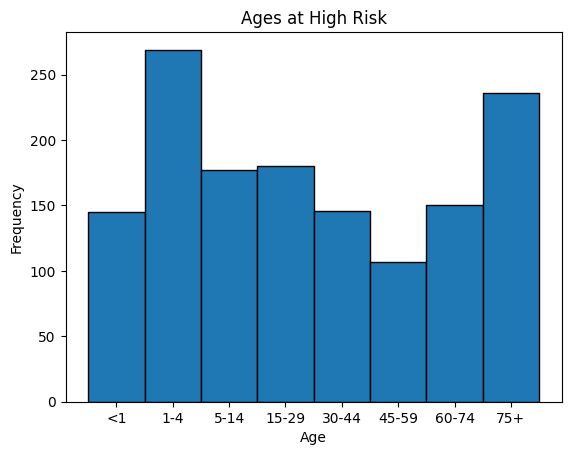

In [51]:
filtered_risk_years = [age for age_range in df1['risk_years'] if age_range != 'NA' for age in age_range]
filtered_risk_years += ['<1']
ordered_age_ranges = ['<1', '1-4', '5-14', '15-29', '30-44', '45-59', '60-74', '75+']
plt.hist(filtered_risk_years, bins=np.arange(len(ordered_age_ranges) + 1) - 0.5, edgecolor='black', align='left')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Ages at High Risk')
plt.xticks(np.arange(len(ordered_age_ranges)) - 0.5, ordered_age_ranges)
plt.show()


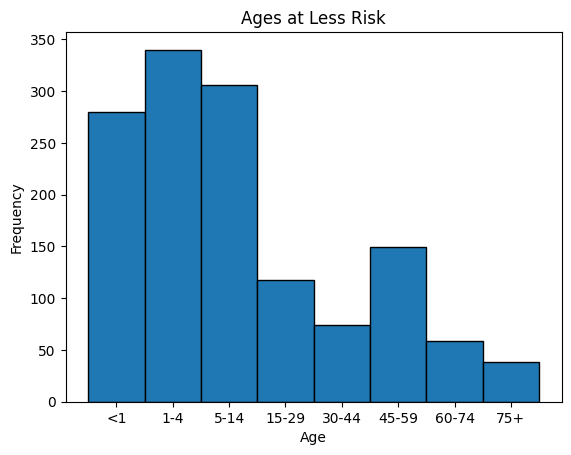

In [54]:
filtered_risk_years = [age for age_range in df1['less_risk_years'] if age_range != 'NA' for age in age_range]
filtered_risk_years += ['<1']
ordered_age_ranges = ['<1', '1-4', '5-14', '15-29', '30-44', '45-59', '60-74', '75+']
plt.hist(filtered_risk_years, bins=np.arange(len(ordered_age_ranges) + 1) - 0.5, edgecolor='black', align='left')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Ages at Less Risk')
plt.xticks(np.arange(len(ordered_age_ranges)) - 0.5, ordered_age_ranges)
plt.show()


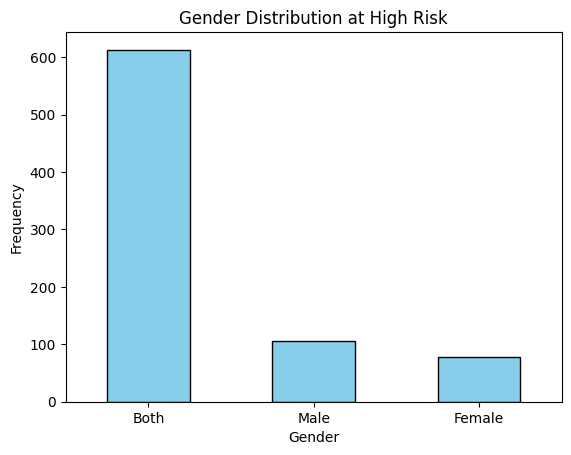

In [55]:
gender_counts = df1['high_risk_gender'].value_counts()
ax = gender_counts.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Distribution at High Risk')
plt.xticks(rotation=0)
ax.set_xticklabels(['Both', 'Male', 'Female'])
plt.show()

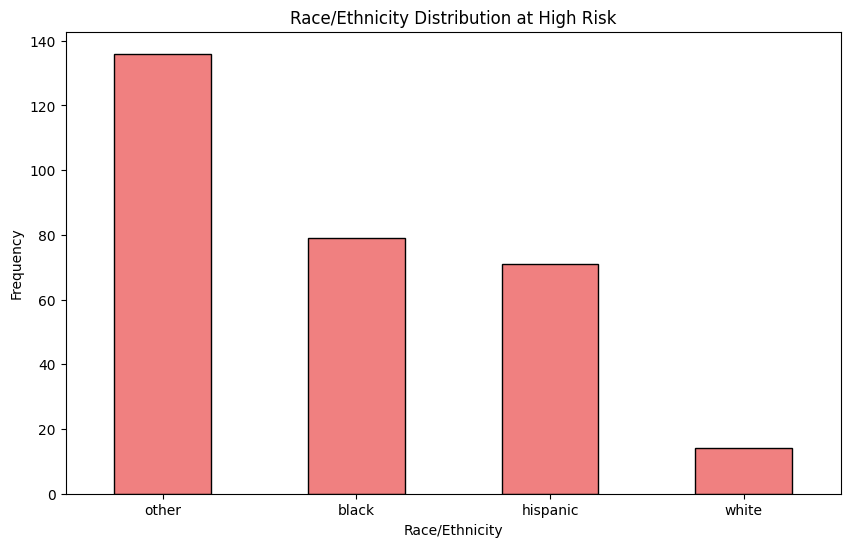

In [56]:
filtered_high_risk_race = [race for race_list in df1['high_risk_race_ethnicity'] if race_list != '[NA]' for race in race_list]
race_counts = pd.Series(filtered_high_risk_race).value_counts()
race_counts = race_counts.iloc[1:]
plt.figure(figsize=(10, 6))
ax = race_counts.plot(kind='bar', edgecolor='black', color='lightcoral')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Frequency')
plt.title('Race/Ethnicity Distribution at High Risk')
plt.xticks(rotation=0)
plt.show()


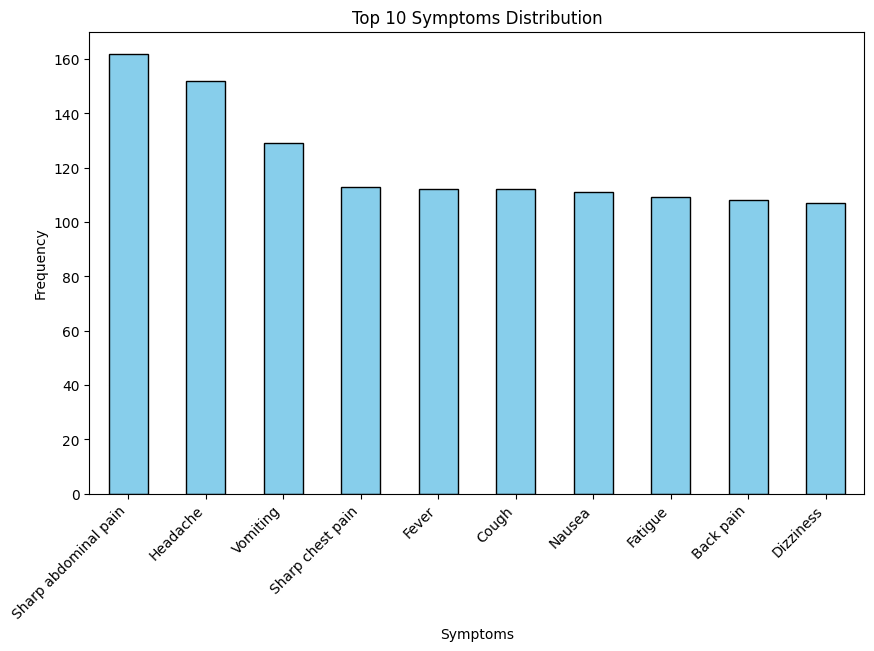

In [57]:
symptom_names = [symptom for symptoms_dict in df1['symptoms'] if symptoms_dict != {} for symptom in symptoms_dict.keys()]
symptom_counts = pd.Series(symptom_names).value_counts().sort_values(ascending=False)
top_10_symptoms = symptom_counts.head(10)
plt.figure(figsize=(10, 6))
top_10_symptoms.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.title('Top 10 Symptoms Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()
